Hospitals datasets

In [373]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 25) # ограничение на количество отображаемых столбцов на экране (если не помещается)

Импорт данных csv

In [375]:
general, prenatal, sports = [pd.read_csv(r'general.csv'),
                             pd.read_csv(r'prenatal.csv'),
                             pd.read_csv(r'sports.csv')]

In [376]:
general.head()

,Unnamed: 0,hospital,gender,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
0,0,general,man,33,1.64,66,24.9,cold,t,NaN,NaN,NaN,NaN,NaN,NaN
1,1,general,man,48,1.93,106,28.4,stomach,t,NaN,t,NaN,NaN,NaN,NaN
2,2,general,woman,23,1.54,63,26.8,cold,t,NaN,NaN,NaN,NaN,NaN,NaN
3,3,general,man,27,1.94,103,27.5,stomach,t,NaN,t,NaN,NaN,NaN,NaN
4,4,general,woman,22,1.76,74,24.0,dislocation,NaN,NaN,NaN,NaN,f,NaN,NaN


Удалить лишнюю колонку (unnamed: 0)

In [377]:
prenatal.drop(columns='Unnamed: 0', axis=1, inplace=True)
sports.drop(columns='Unnamed: 0', axis=1, inplace=True)
general.drop(columns='Unnamed: 0', axis=1, inplace=True)

Привести столбцы к единому виду

In [378]:
prenatal.columns = sports.columns = general.columns

In [379]:
general.head()

,hospital,gender,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
0,general,man,33,1.64,66,24.9,cold,t,NaN,NaN,NaN,NaN,NaN,NaN
1,general,man,48,1.93,106,28.4,stomach,t,NaN,t,NaN,NaN,NaN,NaN
2,general,woman,23,1.54,63,26.8,cold,t,NaN,NaN,NaN,NaN,NaN,NaN
3,general,man,27,1.94,103,27.5,stomach,t,NaN,t,NaN,NaN,NaN,NaN
4,general,woman,22,1.76,74,24.0,dislocation,NaN,NaN,NaN,NaN,f,NaN,NaN


Объединение трех датафреймов в один. Ignore_index=True сбрасывает индексацию.

In [380]:
full = pd.concat([general, prenatal, sports], ignore_index=True)

Удаляем полностью пустые строки (how='all' значит что для удаления ВСЕ значения в строке должны быть Nan), заполняем Nan нулями.

In [381]:
full = full.dropna(how='all')
full = full.fillna(0)

In [382]:
full.columns

Index(['hospital', 'gender', 'age', 'height', 'weight', 'bmi', 'diagnosis',
       'blood_test', 'ecg', 'ultrasound', 'mri', 'xray', 'children', 'months'],
      dtype='object')

Приводим столбец gender к виду f/m

In [383]:
full['gender'] = full['gender'].replace({'man': 'm', 'male': 'm', 'woman': 'f', 'female': 'f', 0: 'f'})

In [384]:
full.head()

,hospital,gender,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
0,general,m,33.0,1.64,66.0,24.9,cold,t,0,0,0,0,0.0,0.0
1,general,m,48.0,1.93,106.0,28.4,stomach,t,0,t,0,0,0.0,0.0
2,general,f,23.0,1.54,63.0,26.8,cold,t,0,0,0,0,0.0,0.0
3,general,m,27.0,1.94,103.0,27.5,stomach,t,0,t,0,0,0.0,0.0
4,general,f,22.0,1.76,74.0,24.0,dislocation,0,0,0,0,f,0.0,0.0


Отбор столбца hospital, подсчет количества значений в столбце для разных hospital

In [385]:
full.hospital.value_counts()

general     461
prenatal    325
sports      214
Name: hospital, dtype: int64

В какой больнице больше всего пациентов?

In [386]:
full.hospital.value_counts().idxmax()

'general'

Отбор всех строк, для которых значение hospital равно general И значение diagnosis равно stomach.

In [387]:
full.query("hospital=='general' and diagnosis=='stomach'").head()

,hospital,gender,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
1,general,m,48.0,1.93,106.0,28.4,stomach,t,0,t,0,0,0.0,0.0
3,general,m,27.0,1.94,103.0,27.5,stomach,t,0,t,0,0,0.0,0.0
6,general,f,68.0,1.80,85.0,26.4,stomach,f,0,f,0,0,0.0,0.0
11,general,m,57.0,1.86,95.0,27.5,stomach,f,0,f,0,0,0.0,0.0
14,general,f,47.0,1.80,83.0,25.9,stomach,t,0,f,0,0,0.0,0.0


Посчитать количество пациентов в General поступивших со Stomach (количество строк)

In [388]:
full.query("hospital=='general' and diagnosis=='stomach'").count()[0]

150

Получим общее число записей при условии hospital == general тем же путем

In [389]:
full.query("hospital=='general'").count()[0]

461

Узнаем долю записей с диагнозом stomach в больнице general среди всех записей в больнице general, округлим до 3 знаков.

In [390]:
round(full.query("hospital=='general' and diagnosis=='stomach'").count()[0] / full.query("hospital=='general'").count()[0], 3)

0.325

Посчитаем медианы при условии что hospital равно general

In [391]:
full.query("hospital=='general'").median()

age         38.00
height       1.72
weight      77.00
bmi         26.60
mri          0.00
children     0.00
months       0.00
dtype: float64

Посчитаем медианы при условии что hospital равно general, затем для sports, и найдем разницу

Медиана age для general

In [392]:
full.query("hospital=='general'").median()['age']

38.0

In [393]:
(full.query("hospital=='sports'").median())['age']

19.0

In [394]:
(full.query("hospital=='general'").median())['age'] - (full.query("hospital=='sports'").median())['age']

19.0

Отберем только те строки, в которых значение столбца blood_test равно 't' (true, т.е. брали анализ крови)

In [395]:
(full.query('blood_test == "t"')).head()

,hospital,gender,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
0,general,m,33.0,1.64,66.0,24.9,cold,t,0,0,0,0,0.0,0.0
1,general,m,48.0,1.93,106.0,28.4,stomach,t,0,t,0,0,0.0,0.0
2,general,f,23.0,1.54,63.0,26.8,cold,t,0,0,0,0,0.0,0.0
3,general,m,27.0,1.94,103.0,27.5,stomach,t,0,t,0,0,0.0,0.0
5,general,m,46.0,1.90,96.0,26.6,heart,t,t,0,0,0,0.0,0.0


ИЛИ

In [396]:
full.loc[full.blood_test == 't'].head()

,hospital,gender,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
0,general,m,33.0,1.64,66.0,24.9,cold,t,0,0,0,0,0.0,0.0
1,general,m,48.0,1.93,106.0,28.4,stomach,t,0,t,0,0,0.0,0.0
2,general,f,23.0,1.54,63.0,26.8,cold,t,0,0,0,0,0.0,0.0
3,general,m,27.0,1.94,103.0,27.5,stomach,t,0,t,0,0,0.0,0.0
5,general,m,46.0,1.90,96.0,26.6,heart,t,t,0,0,0,0.0,0.0


отсюда заберем только столбец hospital

In [397]:
full.loc[full.blood_test == 't'].hospital

0       general
1       general
2       general
3       general
5       general
         ...   
784    prenatal
785    prenatal
786    prenatal
787    prenatal
788    prenatal
Name: hospital, Length: 508, dtype: object

подсчет количества значений в столбце для разных hospital

In [398]:
full.loc[full.blood_test == 't'].hospital.value_counts()

prenatal    325
general     183
Name: hospital, dtype: int64

В какой больнице чаще всего брали кровь на анализ? Сколько раз? нужно отобрать как максимальное значение, так и его индекс. 

In [399]:
full.loc[full.blood_test == 't'].hospital.value_counts().idxmax()

'prenatal'

In [400]:
full.loc[full.blood_test == 't'].hospital.value_counts().max()

325

Средний рост по больнице

In [401]:
full.groupby(['hospital']).agg({'height' : 'mean'})

,height
hospital,
general,1.729219
prenatal,1.690862
sports,6.288612


Что-то с ростом в sports? проверим

In [402]:
full.query("hospital=='sports'").loc[:, 'height'].describe()

count    214.000000
mean       6.288612
std        0.509364
min        4.799000
25%        5.962750
50%        6.276000
75%        6.642750
max        7.700000
Name: height, dtype: float64

In [403]:
full.query("hospital=='general'").loc[:, 'height'].describe()

count    461.000000
mean       1.729219
std        0.154478
min        1.260000
25%        1.630000
50%        1.720000
75%        1.810000
max        2.230000
Name: height, dtype: float64

In [404]:
full.query("hospital=='prenatal'").loc[:, 'height'].describe()

count    325.000000
mean       1.690862
std        0.117701
min        1.380000
25%        1.610000
50%        1.690000
75%        1.780000
max        1.990000
Name: height, dtype: float64

Максимальный рост в general и prenatal меньше чем минимальный в sports, здесь какая-то аномалия в данных.

Посмотрим на графике

In [405]:
# список стилей для графиков
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [406]:
plt.style.use('seaborn-deep')

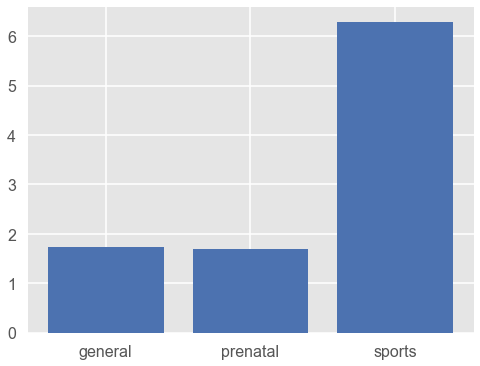

In [407]:
x = full.groupby('hospital').agg({'height' : 'mean'}).index # по оси х индексы отобранной серии т.н. лейблы
y = full.groupby('hospital').agg({'height' : 'mean'})['height'] # по оси y значения отобранной серии

fig, ax = plt.subplots() # subplots применяется для нескольких графиков за один вывод
ax.bar(x, y) # если делать один график то указываем просто plt.bar(x, y)

fig.set_figwidth(8)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure

plt.show()

Посмотрим средний возраст по больницам

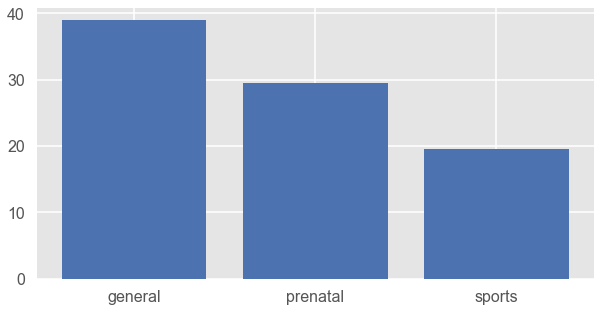

In [408]:
x = full.groupby('hospital').agg({'age' : 'mean'}).index
y = full.groupby('hospital').agg({'age' : 'mean'})['age']

plt.figure(figsize =(10, 5))
plt.bar (x, y)
plt.show()

Оценим количество заболеваний по всем больницам

In [409]:
full.diagnosis.value_counts()

pregnancy      318
cold           194
stomach        157
sprain         104
dislocation     86
fracture        85
heart           56
Name: diagnosis, dtype: int64

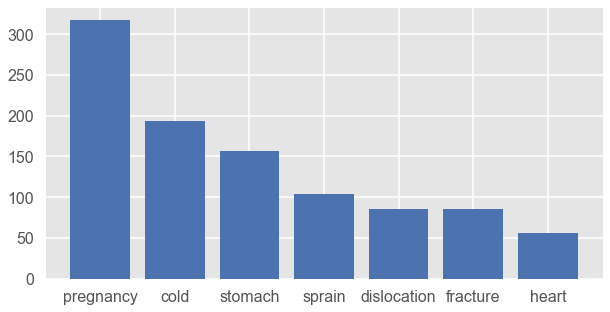

In [410]:
x = full.diagnosis.value_counts().index
y = full.diagnosis.value_counts().values

plt.figure(figsize=(10, 5))
plt.bar(x, y)
plt.show()

<BarContainer object of 7 artists>

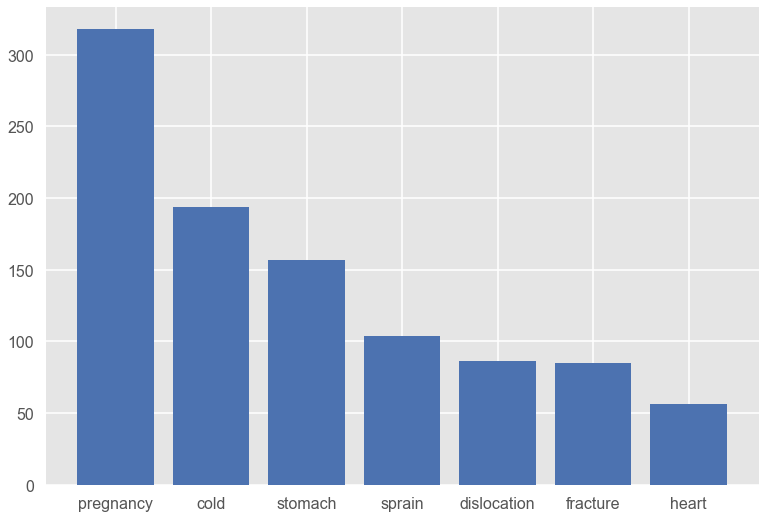

In [411]:
# или просто
plt.bar(x, y)

Можно также посмотреть на "пироге"

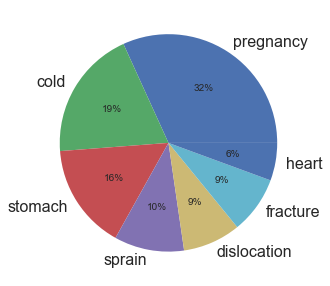

In [412]:
plt.figure(figsize=(5, 5))
plt.pie(full.diagnosis.value_counts().values, labels=full.diagnosis.value_counts().index, autopct='%1.0f%%')
plt.show()